In [10]:
! git clone https://github.com/simatec-uis/CO2Dnet
%cd CO2Dnet/unet-tf2/

fatal: destination path 'CO2Dnet' already exists and is not an empty directory.
/content/CO2Dnet/unet-tf2/CO2Dnet/unet-tf2


### Step1: Detection Influence

In [11]:
import os
import numpy as np 
import tensorflow as tf
from unet_tf2.dataset import data_pipeline
from unet_tf2.utils import build_data

In [12]:
features =  24
levels =  5

epochs = 10#@param
batch_size =  8#@param
learning_rate = 9e-4 #@param
seed = 2202
SIZE = 320
RUN_ID = 9 #@param {type:"slider", min:0, max:9, step:1}


calibration = False  #@param {type:"boolean"}
pretraining = True  #@param {type:"boolean"}
augmentation = True  #@param {type:"boolean"}

dataset = f"../data"
data_main = "results"

  
weigths_path = f'../{data_main}/weights/run={RUN_ID}.h5'
tmp_weigths_path = f'/tmp/temp_run={RUN_ID}.h5'

x_path = os.path.join(dataset, 'JPEGImages')
y_path = os.path.join(dataset, 'Mask')

train_path = os.path.join(dataset, 'ImageSets', 'Cross', f'train_{RUN_ID}.txt')
val_path = os.path.join(dataset, 'ImageSets', 'Cross', f'val_{RUN_ID}.txt')

In [13]:
train_ds = build_data(x_path, y_path, train_path, Xextension='.jpg')
validation_data = build_data(x_path, y_path, val_path, Xextension='.jpg')

train_ds = tuple([  tf.data.Dataset.from_tensors(x).unbatch() for x in train_ds ])
train_ds = data_pipeline(train_ds, augmented=augmentation, detection=True)

val_ds = tuple([  tf.data.Dataset.from_tensors(x).unbatch() for x in validation_data ])
val_ds = data_pipeline(val_ds, batch_size=1, augmented=False, detection=True)

In [14]:
from unet_tf2.utils import build_data, iou_coef, dice_coef
from unet_tf2.models.unet import Unet

from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.callbacks import (
    ReduceLROnPlateau,
    ModelCheckpoint,
    EarlyStopping)

metrics = None
model = Unet((SIZE, SIZE, 3),  features, levels)

callbacks = [ReduceLROnPlateau(verbose=1,
                              patience=20,         
                              factor=0.98, 
                              monitor='loss'),
             ModelCheckpoint(tmp_weigths_path,
                             monitor='val_dice_coef',
                             save_best_only=True,
                             save_weights_only=True,
                             mode='max')]

optimizer = tf.keras.optimizers.Adam(learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[ dice_coef, Precision(), Recall(), 'accuracy'])
model.summary()

Model: "Unet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 320, 320, 3)]     0         
                                                                 
 unet_layer_1 (UnetLayer)    (None, 320, 320, 24)      17705832  
                                                                 
 conv2d_45 (Conv2D)          (None, 320, 320, 1)       25        
                                                                 
Total params: 17,705,857
Trainable params: 17,696,833
Non-trainable params: 9,024
_________________________________________________________________


In [15]:
if pretraining:
  model.load_weights(weigths_path)
  
model.fit(train_ds, epochs=epochs,  callbacks=callbacks, validation_data=val_ds)
model.load_weights(tmp_weigths_path)

Epoch 1/10
15/15 [==============================] - 23s 450ms/step - loss: 1.7455 - dice_coef: 0.6718 - precision_1: 0.7397 - recall_1: 0.7201 - accuracy: 0.7616 - val_loss: 1.6452 - val_dice_coef: 0.7305 - val_precision_1: 0.7618 - val_recall_1: 0.8345 - val_accuracy: 0.7865 - lr: 9.0000e-04
Epoch 2/10
15/15 [==============================] - 5s 311ms/step - loss: 0.7209 - dice_coef: 0.7357 - precision_1: 0.8175 - recall_1: 0.7448 - accuracy: 0.8149 - val_loss: 0.9035 - val_dice_coef: 0.7522 - val_precision_1: 0.7637 - val_recall_1: 0.8748 - val_accuracy: 0.7996 - lr: 9.0000e-04
Epoch 3/10
15/15 [==============================] - 4s 296ms/step - loss: 0.4580 - dice_coef: 0.7334 - precision_1: 0.8709 - recall_1: 0.6922 - accuracy: 0.8169 - val_loss: 0.5354 - val_dice_coef: 0.5860 - val_precision_1: 0.7608 - val_recall_1: 0.5921 - val_accuracy: 0.7180 - lr: 9.0000e-04
Epoch 4/10
15/15 [==============================] - 4s 297ms/step - loss: 0.3775 - dice_coef: 0.7396 - precision_1: 0.88

1/1 [==============================] - 0s 429ms/step


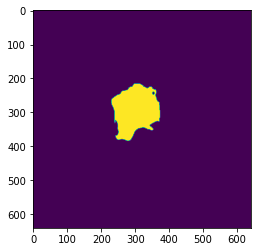

../results/predictions/run9/segmented_0.png
1/1 [==============================] - 0s 21ms/step


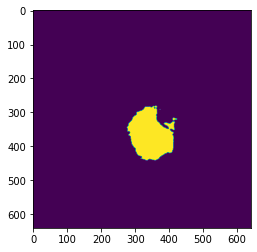

../results/predictions/run9/segmented_1.png
1/1 [==============================] - 0s 20ms/step


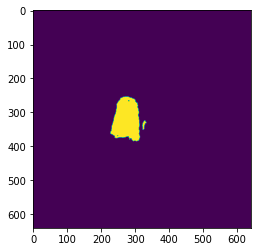

../results/predictions/run9/segmented_2.png
1/1 [==============================] - 0s 19ms/step


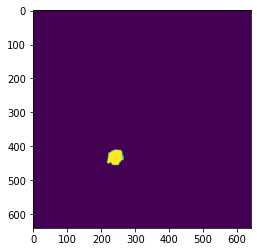

../results/predictions/run9/segmented_3.png
1/1 [==============================] - 0s 45ms/step


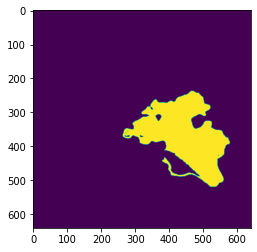

../results/predictions/run9/segmented_4.png
1/1 [==============================] - 0s 60ms/step


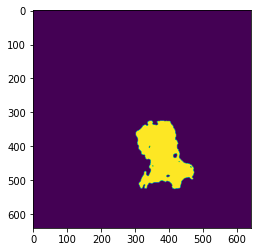

../results/predictions/run9/segmented_5.png
1/1 [==============================] - 0s 70ms/step


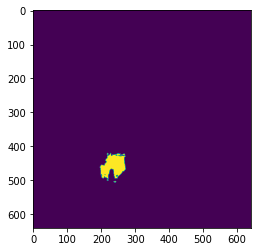

../results/predictions/run9/segmented_6.png
1/1 [==============================] - 0s 74ms/step


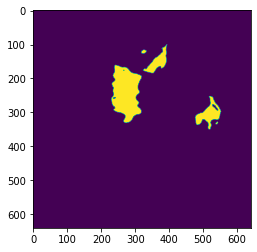

../results/predictions/run9/segmented_7.png
1/1 [==============================] - 0s 32ms/step


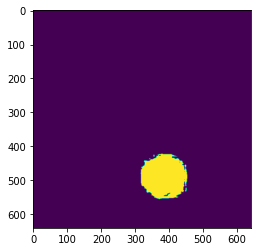

../results/predictions/run9/segmented_8.png
1/1 [==============================] - 0s 19ms/step


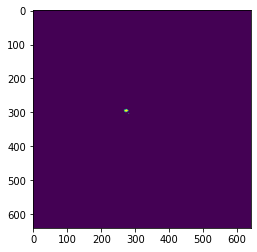

../results/predictions/run9/segmented_9.png
1/1 [==============================] - 0s 19ms/step


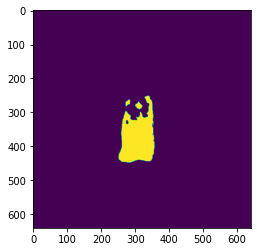

../results/predictions/run9/segmented_10.png
1/1 [==============================] - 0s 20ms/step


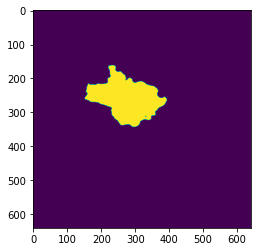

../results/predictions/run9/segmented_11.png
1/1 [==============================] - 0s 19ms/step


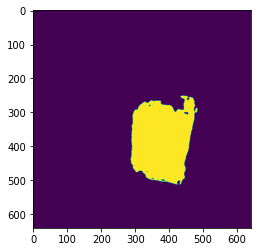

../results/predictions/run9/segmented_12.png


In [20]:
import cv2
import matplotlib.pyplot as plt 
from unet_tf2.dataset import get_coords

MODE = "predictions"
save_path = f"../{data_main}/{MODE}/run{RUN_ID}"
save_folder =  f"../{data_main}/{MODE}"

if not os.path.exists(save_folder):
  os.mkdir(save_folder)

if not os.path.exists(save_path):
  os.mkdir(save_path)
  

val_ds = tuple([  tf.data.Dataset.from_tensors(x).unbatch() for x in validation_data ])
val_ds = data_pipeline(val_ds, batch_size=1, augmented=False, detection=True, original=True)

id = 0;
for sample in val_ds:

  x, (y_crop, y) = sample


  cord_h, cord_w, h_size, w_size = get_coords(y[0])


  y_pred = model.predict(x)
  y_pred = tf.image.resize(y_pred, [h_size, w_size] )
  y_pred = y_pred.numpy()
  y_pred = 1*(y_pred > 0.5)
  temp = np.uint8( y_pred[0]*255 )

  y_pred = np.zeros( y.shape )
  y_pred[:, cord_h:cord_h+h_size, cord_w:cord_w+w_size] = temp
  y_pred = y_pred[0,..., 0]

  plt.imshow(y_pred)
  plt.show()

  img_save = f"segmented_{id}.png"
  img_path = os.path.join(save_path, img_save)

  print(img_path)
  cv2.imwrite(img_path, y_pred)

  id = id+1

In [27]:
%cd  ../results
!python save_results.py --mode {MODE} --runid {RUN_ID}

/content/CO2Dnet/unet-tf2/CO2Dnet/results
Found 13 files belonging to 1 classes.
2022-12-20 15:00:44.893303: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Found 13 files belonging to 1 classes.
[9, 0.775015, 0.75770915, 0.8221534]
Traceback (most recent call last):
  File "save_results.py", line 81, in <module>
    main(args)
  File "save_results.py", line 71, in main
    with open(result_path, 'x') as f:
FileNotFoundError: [Errno 2] No such file or directory: './results/predictions.txt'
